#### statistics

In [1]:
import numpy as np

In [2]:
data = [15, 16, 18, 19, 22, 24, 29, 30, 34]

print("mean:", np.mean(data))
print("median:", np.median(data))
print("50th percentile (median):", np.percentile(data, 50))
print("25th percentile:", np.percentile(data, 25))
print("75th percentile:", np.percentile(data, 75))
print("standard deviation:", np.std(data))
print("variance:", np.var(data))

mean: 23.0
median: 22.0
50th percentile (median): 22.0
25th percentile: 18.0
75th percentile: 29.0
standard deviation: 6.342099196813483
variance: 40.22222222222222


#### reading data with pandas

In [3]:
import pandas as pd

CSV-Tabelle auslesen

In [4]:
df = pd.read_csv('01_titanic.csv')
print(df.head()) #head ruft erste 5 reihen auf

   Survived   Pclass      Sex   Age   Siblings/Spouses   Parents/Children  \
0         0        3     male  22.0                  1                  0   
1         1        1   female  38.0                  1                  0   
2         1        3   female  26.0                  0                  0   
3         1        1   female  35.0                  1                  0   

      Fare  
0   7.2500  
1  71.2833  
2   7.9250  
3  53.1000  


Statistiken ausgeben

In [5]:
pd.options.display.max_columns = 6 #zeigt max. anzahl an spalten an
print(df.describe()) #describe() gibt eine tabelle von statistiken über die spalten zurück

       Survived    Pclass    Age   Siblings/Spouses   Parents/Children  \
count      4.00  4.000000   4.00               4.00                4.0   
mean       0.75  2.000000  30.25               0.75                0.0   
std        0.50  1.154701   7.50               0.50                0.0   
min        0.00  1.000000  22.00               0.00                0.0   
25%        0.75  1.000000  25.00               0.75                0.0   
50%        1.00  2.000000  30.50               1.00                0.0   
75%        1.00  3.000000  35.75               1.00                0.0   
max        1.00  3.000000  38.00               1.00                0.0   

            Fare  
count   4.000000  
mean   34.889575  
std    32.389078  
min     7.250000  
25%     7.756250  
50%    30.512500  
75%    57.645825  
max    71.283300  


#### manipulating data with pandas

nur 1 Spalte auswählen

In [6]:
df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
col = df['Fare']
print(col)

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
882    13.0000
883    30.0000
884    23.4500
885    30.0000
886     7.7500
Name: Fare, Length: 887, dtype: float64


mehrere (bestimmte) Spalten auswählen

In [7]:
small_df = df[['Age', 'Sex', 'Survived']] #wählt nur diese 3 spalten aus
print(small_df.head())

    Age     Sex  Survived
0  22.0    male         0
1  38.0  female         1
2  26.0  female         1
3  35.0  female         1
4  35.0    male         0


neue Spalte erstellen

In [8]:
df['male'] = df['Sex'] == 'male' #vergleicht ob spalte 'sex' == 'male' beinhaltet in jeder zeile
#print(df.head())

df['First Class'] = df['Pclass'] == 1 #ob passagier in pclass1 in first_class ist
print(df.head())

   Survived  Pclass     Sex  ...     Fare   male  First Class
0         0       3    male  ...   7.2500   True        False
1         1       1  female  ...  71.2833  False         True
2         1       3  female  ...   7.9250  False        False
3         1       1  female  ...  53.1000  False         True
4         0       3    male  ...   8.0500   True        False

[5 rows x 9 columns]


#### numpy basics

converting from pandas series to numpy array

In [9]:
print(df['Fare'].values)

[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55     8.05    31.275    7.8542  16.
  29.125   13.      18.       7.225   26.      13.       8.0292  35.5
  21.075   31.3875   7.225  263.       7.8792   7.8958  27.7208 146.5208
   7.75    10.5     82.1708  52.       7.2292   8.05    18.      11.2417
   9.475   21.      41.5792   7.8792   8.05    15.5      7.75    21.6792
  17.8     39.6875   7.8     76.7292  26.      61.9792  35.5     10.5
   7.2292  27.75    46.9      7.2292  80.      83.475   27.9     27.7208
  15.2458  10.5      8.1583   7.925    8.6625  10.5     46.9     73.5
  14.4542  56.4958   7.65     7.8958   8.05    29.      12.475    9.
   9.5      7.7875  47.1     10.5     15.85    34.375    8.05   263.
   8.05     8.05     7.8542  61.175   20.575    7.25     8.05    34.6542
  63.3583  23.      26.       7.8958   7.8958  77.2875   8.6542   7.925
   7.8958   7.65     7.775    7.8958  24.15    52.      14.4542   8.05
   

converting from a pandas dataframe to a numpy array

In [10]:
print(df[['Pclass', 'Fare', 'Age']].values) #result: 2d, da 2 eckige klammern um array

[[ 3.      7.25   22.    ]
 [ 1.     71.2833 38.    ]
 [ 3.      7.925  26.    ]
 ...
 [ 3.     23.45    7.    ]
 [ 1.     30.     26.    ]
 [ 3.      7.75   32.    ]]


numpy shape attribute

In [11]:
arr = df[['Pclass', 'Fare', 'Age']].values
print(arr.shape) #gibt aus, wie viele (zeilen, spalten) im datensatz sind

(887, 3)


#### more with numpy arrays

slicing

In [12]:
arr = df[['Pclass', 'Fare', 'Age']].values
#print(arr[0, 1]) #ruft einzelnes element auf
#print(arr[0]) #ruft einzlne zeile auf
print(arr[:,2]) #ruft nur ausgewählte spalte auf (hier: 'alter')

[22.   38.   26.   35.   35.   27.   54.    2.   27.   14.    4.   58.
 20.   39.   14.   55.    2.   23.   31.   22.   35.   34.   15.   28.
  8.   38.   26.   19.   24.   23.   40.   48.   18.   66.   28.   42.
 18.   21.   18.   14.   40.   27.    3.   19.   30.   20.   27.   16.
 18.    7.   21.   49.   29.   65.   46.   21.   28.5   5.   11.   22.
 38.   45.    4.   64.    7.   29.   19.   17.   26.   32.   16.   21.
 26.   32.   25.   23.   28.    0.83 30.   22.   29.   31.   28.   17.
 33.   16.   20.   23.   24.   29.   20.   46.   26.   59.   22.   71.
 23.   34.   34.   28.   29.   21.   33.   37.   28.   21.   29.   38.
 28.   47.   14.5  22.   20.   17.   21.   70.5  29.   24.    2.   21.
 19.   32.5  32.5  54.   12.   19.   24.    2.   45.   33.   20.   47.
 29.   25.   23.   19.   37.   16.   24.   40.   22.   24.   19.   18.
 19.   27.    9.   36.5  42.   51.   22.   55.5  40.5  27.   51.   16.
 30.   37.    5.   44.   40.   26.   17.    1.    9.   48.   45.   60.
 28.  

mask: boolean of a column

In [13]:
arr = df[['Pclass', 'Fare', 'Age']].values[:20] #slicing wählt nur einen teil aus

#zu lang:
mask = arr[:, 2] < 18 #alle passagiere jünger als 18
print(arr[mask]) #spalte3 ist das alter

#kürzer als über mask:
print(arr[arr[:,2] < 18])

[[ 3.     21.075   2.    ]
 [ 2.     30.0708 14.    ]
 [ 3.     16.7     4.    ]
 [ 3.      7.8542 14.    ]
 [ 3.     29.125   2.    ]]
[[ 3.     21.075   2.    ]
 [ 2.     30.0708 14.    ]
 [ 3.     16.7     4.    ]
 [ 3.      7.8542 14.    ]
 [ 3.     29.125   2.    ]]


summing and counting

In [14]:
arr = df[['Pclass', 'Fare', 'Age']].values

#länger:
mask = arr[:,2] < 18
print(mask.sum()) #zählt wie viele passagiere unter 18 sind

#kürzer:
print((arr[:,2] < 18).sum())

130
130


#### plotting basics

In [15]:
import matplotlib.pyplot as plt

funktion zeichnen

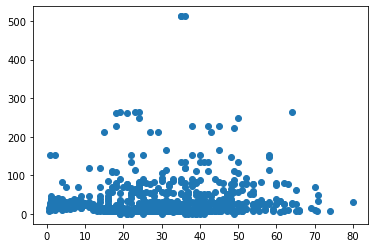

In [16]:
plt.scatter(df['Age'], df['Fare']) #scatter: stellt daten dar, 1.funktion = x-achse, 2.funktion = y-achse

x-achse und y-achse beschriften

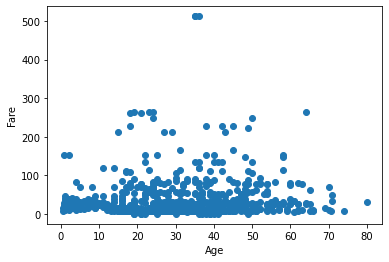

In [17]:
plt.xlabel('Age')
plt.ylabel('Fare')
plt.scatter(df['Age'], df['Fare']) #scatter: stellt daten dar, 1.funktion = x-achse, 2.funktion = y-achse

Diagramm farbig machen 

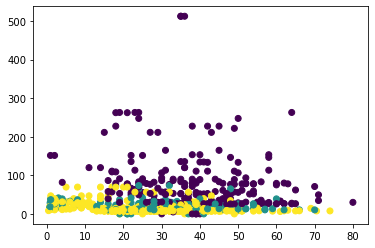

In [18]:
plt.scatter(df['Age'], df['Fare'], c=df['Pclass']) #c-parameter sorgt erst für einfärbung (prüft ob in pclass)

Text(0, 0.5, 'Pclass')

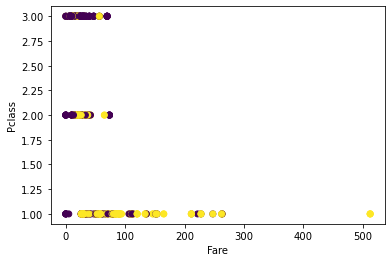

In [19]:
#farbe: ob überlebt oder nicht
plt.scatter(df['Fare'], df['Pclass'], c=df['Survived'])
plt.xlabel('Fare')
plt.ylabel('Pclass')

Linie zeichnen

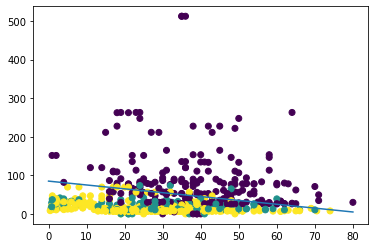

In [20]:
plt.plot([0, 80], [85, 5]) #zeichenschema: [0, 85] bis [80, 5]
plt.scatter(df['Age'], df['Fare'], c=df['Pclass']) #c-parameter sorgt erst für einfärbung (prüft ob in pclass)